# Вычислительные методы в физике

## Фитирование
Пусть есть набор экспериментальных точек $(x_i, y_i)$ (полученных, естественно, с некоторой погрешностью) и есть некоторая функция $F(x,\theta)$, которая предположительно описывает нашу экспериментальную зависимость при некотором $\hat{\theta}$. Процедура поиска значения параметра или набора параметров $\theta^*$, при которых функция $(x,\theta)$ наилучшим образом описывает экспериментальные точки, называется фитированием.

Фитирование важная процедура и многие математический библиотеки имеют функции для проведения этой операции.


### Определение положения пика

Фитирование может применяться для определения положения пика. В качестве примера можно рассмотреть график, иллюстрирующий открытие бозона Хиггса: 
![](./example_fit.jpg)
Красной линией на верхнем графике показан результат фитирования экпериментальных данных с помощью суммы двух функций: описывающей фоновую подложку и форму пика.
Проведя процедуру фитирования можно получить точное положения максимума пика и его ширину. 


### Пример 1

Пусть есть истиная функция $y = x^2 - x + 1$, и результат измерения этой зависимости (файл `example_fit.dat`). Предположим, что нам из каких-то теоретических предположений известно, что зависимость должна быть параболической, и мы пытаемся восстановить параметры этой параболы. Для этого мы воспользуемся функцией `curve_fit` из модуля `scipy.optimize`

In [5]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [3]:
# #Так были сгенерированны данные
# from tabulate import tabulate
# n = 15
# x = np.linspace(0, 1, n)
# y_true = x**2 - x + 1
# error = y_true*0.1*np.random.sample(n)
# y = np.random.normal(y_true, error)
# with open('example_fit.txt', 'w') as fout:
#     text = tabulate(zip(x,y, error), headers = ('x', 'y', 'y_error'), tablefmt='plain')
#     fout.write(text)

In [11]:
data = pd.read_table('example_fit.txt', # имя или путь к файлу    
                    sep = '\s+' # Здесь указывается разделитель между значениями, используемыми в файле
                    )

In [12]:
# Создадим переменные с короткими именами
x = data['x']
y = data['y']
yerr = data['y_error']

In [4]:
x[0] # получить одно значение

0.0

In [5]:
x[5:10] # выбрать диапазон значений

array([ 0.35714286,  0.42857143,  0.5       ,  0.57142857,  0.64285714])

In [13]:
def parabolla(x, a, b, c):
    """
    Параметрическая парабола
    """
    return a*x**2 + b*x + c

In [14]:
result = curve_fit(f = parabolla, # функция, для которой ищутся параметры
                   xdata= x, ydata=y, # вводим экспериментальные точки
          )

Функция `curve_fit`  имеет большой список параметров. Например, кроме экспериментальных точек можно указать их ошибки, и тогда будет применен алгоритм фитирования, учитывающий величины ошибок, или начальную точку для поиска значения параметров. 

In [15]:
popt, pcov = result # декомпозиция кортежа по отдельным переменным

In [29]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16 # Управление стилем, в данном случаем - размером шрифта 

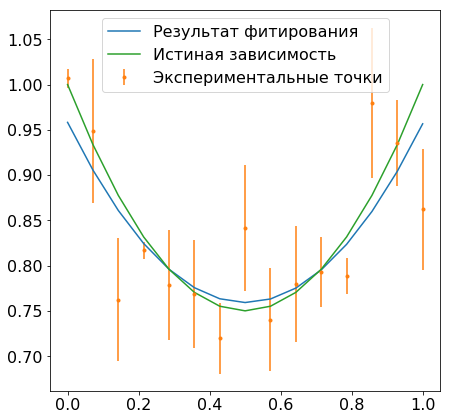

In [17]:
plt.figure(figsize= (7,7)) # Настраиваем размер холста
plt.plot(x, parabolla(x, *popt), label='Результат фитирования') # Строим график
plt.errorbar(x,y, yerr=yerr, fmt='.', label='Экспериментальные точки') # Строим график с "крестами"
plt.plot(x, parabolla(x, 1,-1,1), label="Истиная зависимость")
plt.legend(); # Активируем легенду

### Пример 2: 

Для приближения функции многочленом можно использовать `numpy.polyfit()`

[ 3.00601091  4.85432505  6.48622882]
[[  2.11152260e-02  -4.35855647e-18  -2.15062487e-01]
 [ -4.35855647e-18   1.66836354e-01   5.77114466e-20]
 [ -2.15062487e-01   5.77114466e-20   3.88971042e+00]]
a = 3.01 ± 0.15
b = 4.85 ± 0.41
c = 6.49 ± 1.97


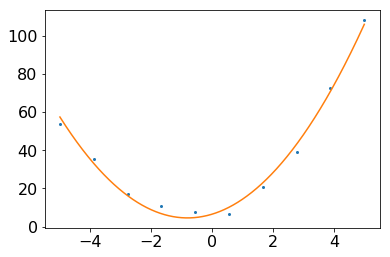

In [22]:
z = np.linspace(-5, 5, 1000)

# Данные
x = np.linspace(-5, 5, 10)
y = 3*x**2 + 5*x + 1 + 10*np.random.sample(len(x))

# Фитируем многочленом второй степени с рассчетом матрицы ошибок
params, cov = np.polyfit(x, y, 2, cov=True)
plt.plot(x, y, 'o', markersize=2)
plt.plot(z, params[0] * z**2 + params[1] * z + params[2])
print(params)
print(cov)
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")
print(f"c = {params[2]:.3} \u00B1 {np.sqrt(cov[2][2]):.3}")

### Пример 3

[  45.40114559  341.39906678   88.62304246]
[[ 17.35905932  -6.77377934   0.75023018]
 [ -6.77377934   4.29974581  -2.95671194]
 [  0.75023018  -2.95671194  10.18644967]]
a = 45.4 ± 4.2
b = 3.41e+02 ± 2.1
c = 88.6 ± 3.19


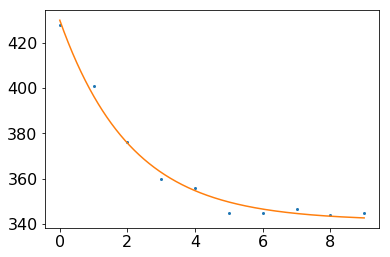

In [23]:
from scipy.optimize import curve_fit

# Функция, которой нужно приблизить зависимость
def fit_func(x, a, b, c):
    return c*np.exp(-x*1.9*11.34/a)+b

# Данные
z = np.linspace(0, 9, 1000)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [428.,  401.,  376.,  360.,  356.,  345.,  345.,  346.5, 344.,  345.]

# Получение параметров и ошибок по функции и точкам, с указанием начальных параметров
params, cov = curve_fit(fit_func, x, y, p0 = [30, 345, 100])
print(params)
print(cov)

plt.plot(x, y, 'o', markersize=2)
plt.plot(z, fit_func(z, params[0], params[1], params[2]))

print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")
print(f"c = {params[2]:.3} \u00B1 {np.sqrt(cov[2][2]):.3}")

## Гистограммы и распределения

### Закон больших чисел

ЗБЧ говорит нам о сходимости среднеего по выборке из распределения к математическому ожиданию от этого распределения. Привеженный ниже код эмулирует бросок игрального кубика. 
Изучите как меняется среднее от размера выборки. Выполняется ли ЗБЧ?

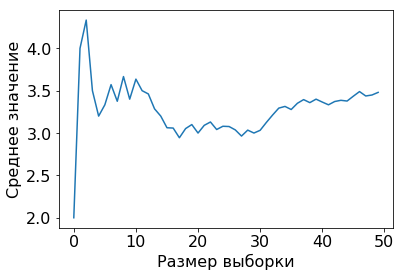

In [24]:
n = 50 # Размер выборки
np.random.seed(10) # Фиксирует состояниее ГПСЧ, для повторяемости случайных последовательностей
sample = np.random.randint(1,7,size=n) # Правая граница не включается
means = np.cumsum(sample)/np.arange(1, n+1)

plt.ylabel("Среднее значение")
plt.xlabel('Размер выборки')
plt.plot(means);

# Фурье-преобразование

In [1]:
from numpy.fft import rfft, rfftfreq


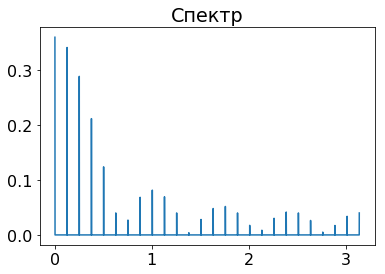

In [30]:
time = np.arange(10000)

signal = np.vectorize(lambda x: 1.0 if 20 < x%50 < 30 else 0.0)(time)
# 
sp = rfft(signal)
freq = rfftfreq(time.size)
plt.plot(2*np.pi*freq, np.absolute(sp)/(time.size/2))
plt.title("Спектр");

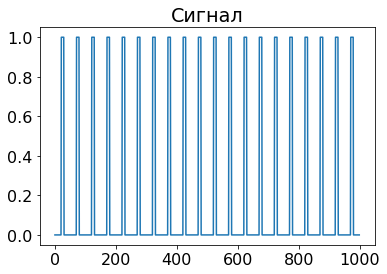

In [31]:
plt.plot(time[:1000], signal[:1000])
plt.title("Сигнал");